## 2.4　ここで差がつく！仮説に基づいて新しい特徴量を作ってみよう

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4.1　再現性の大切さ

In [4]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()

# data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

`np.random.randint` は、乱数固定をしない場合、毎回違う値が出力されてしまう。

In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)

### 2.4.2　仮説から新しい特徴量を作る

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

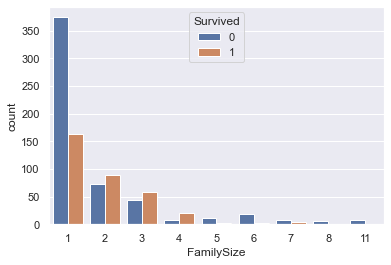

In [6]:
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
sns.countplot(x='FamilySize', data=data, hue='Survived')

In [7]:
data['IsAlone'] = 0
data.loc[data['FamilySize']==1, 'IsAlone'] = 1